<a href="https://colab.research.google.com/github/arezyhs/Python-KNN-NaiveBayes-MLP/blob/main/KNN-MLP-Classifier-for-MNIST-Dataset-with-Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Penerapan Classifier terhadap MNIST Handwritten Dataset Menggunakan Naive Bayes, K Neares Neighbour, dan Multiple Layer Perceptron
---
* **Author**: [arezyhs](https://github.com/arezyhs)
* **Source Dataset**: [Dataset](https://github.com/cvdfoundation/mnist) dan [Original](https://yann.lecun.com/exdb/mnist/)




## Segmen 1: Install dan Import Libraries
Pada segmen ini, kita akan mengimpor semua pustaka yang diperlukan seperti sklearn, matplotlib, numpy, dan pustaka lainnya.


In [1]:
# Install libraries yang dibutuhkan (jika belum diinstal)
!pip install -q scikit-learn seaborn

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import time
import seaborn as sns
from google.colab import files
from PIL import Image
import io

## **Segmen 2: Fungsi untuk Memuat Dataset MNIST**
Segmen ini berisi fungsi untuk membaca file gambar dan label dari dataset MNIST.

In [2]:
# Fungsi untuk membaca file gambar MNIST
def load_mnist_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Fungsi untuk membaca file label MNIST
def load_mnist_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Memuat dataset MNIST
train_images = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')
test_images = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

# Menampilkan dimensi dataset
print(f"Train Images Shape: {train_images.shape}")
print(f"Train Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape}")
print(f"Test Labels Shape: {test_labels.shape}")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


## Segmen 3: Pra-pemrosesan Data
Pada segmen ini, kita akan meratakan (flatten) gambar menjadi vektor 1D dan menormalisasi nilai piksel gambar antara 0 dan 1.

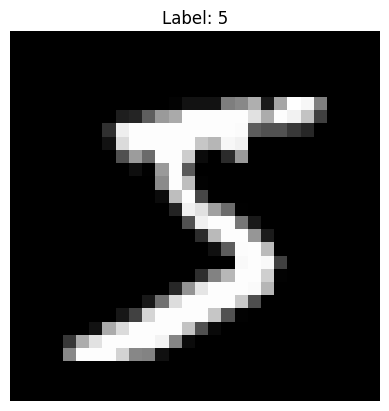

In [3]:
# Pra-pemrosesan: Reshape data menjadi vektor 1D dan normalisasi
train_images_flat = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_flat = test_images.reshape(test_images.shape[0], -1) / 255.0

# Menampilkan contoh gambar untuk memastikan data siap
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.axis('off')
plt.show()

## Segmen 4: Melatih dan Evaluasi Model KNN
Pada segmen ini, kita akan melatih model KNN dan mengevaluasi kinerjanya menggunakan akurasi, precision, recall, F1-score, dan confusion matrix.

In [4]:
# ----------------------
# Model KNN
# ----------------------

print("\nMelatih model KNN...")

# Mengukur waktu pelatihan
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_images_flat, train_labels)
knn_training_time = time.time() - start_time

# Mengukur waktu prediksi
start_time = time.time()
y_test_pred_knn = knn.predict(test_images_flat)
knn_prediction_time = time.time() - start_time

# Evaluasi model KNN menggunakan data uji
test_accuracy_knn = accuracy_score(test_labels, y_test_pred_knn)

# Metode evaluasi tambahan: Precision, Recall, F1-score
precision_knn = precision_score(test_labels, y_test_pred_knn, average='weighted')
recall_knn = recall_score(test_labels, y_test_pred_knn, average='weighted')
f1_knn = f1_score(test_labels, y_test_pred_knn, average='weighted')

# Menghitung confusion matrix untuk KNN
cm_knn = confusion_matrix(test_labels, y_test_pred_knn)

# Menampilkan hasil KNN
print(f"\nKNN Performance:")
print(f"Akurasi pada Data Uji: {test_accuracy_knn * 100:.2f}%")
print(f"Precision: {precision_knn * 100:.2f}%")
print(f"Recall: {recall_knn * 100:.2f}%")
print(f"F1-score: {f1_knn * 100:.2f}%")
print(f"Waktu Pelatihan: {knn_training_time:.4f} detik")
print(f"Waktu Prediksi: {knn_prediction_time:.4f} detik")


Melatih model KNN...

KNN Performance:
Akurasi pada Data Uji: 97.05%
Precision: 97.07%
Recall: 97.05%
F1-score: 97.05%
Waktu Pelatihan: 0.0598 detik
Waktu Prediksi: 55.2366 detik


## Segmen 5: Melatih dan Evaluasi Model MLP
Segmen ini melatih MLPClassifier (Multilayer Perceptron) dan mengevaluasi kinerjanya dengan metrik yang sama seperti KNN.

In [5]:
# ----------------------
# Model MLP
# ----------------------

print("\nMelatih model MLP...")

# Mengukur waktu pelatihan
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, random_state=42, solver='adam', verbose=True)
mlp.fit(train_images_flat, train_labels)
mlp_training_time = time.time() - start_time

# Mengukur waktu prediksi
start_time = time.time()
y_test_pred_mlp = mlp.predict(test_images_flat)
mlp_prediction_time = time.time() - start_time

# Evaluasi model MLP menggunakan data uji
test_accuracy_mlp = accuracy_score(test_labels, y_test_pred_mlp)

# Metode evaluasi tambahan: Precision, Recall, F1-score
precision_mlp = precision_score(test_labels, y_test_pred_mlp, average='weighted')
recall_mlp = recall_score(test_labels, y_test_pred_mlp, average='weighted')
f1_mlp = f1_score(test_labels, y_test_pred_mlp, average='weighted')

# Menghitung confusion matrix untuk MLP
cm_mlp = confusion_matrix(test_labels, y_test_pred_mlp)

# Menampilkan hasil MLP
print(f"\nMLP Performance:")
print(f"Akurasi pada Data Uji: {test_accuracy_mlp * 100:.2f}%")
print(f"Precision: {precision_mlp * 100:.2f}%")
print(f"Recall: {recall_mlp * 100:.2f}%")
print(f"F1-score: {f1_mlp * 100:.2f}%")
print(f"Waktu Pelatihan: {mlp_training_time:.4f} detik")
print(f"Waktu Prediksi: {mlp_prediction_time:.4f} detik")


Melatih model MLP...
Iteration 1, loss = 0.41619411
Iteration 2, loss = 0.19314035
Iteration 3, loss = 0.14445639
Iteration 4, loss = 0.11472031
Iteration 5, loss = 0.09547300
Iteration 6, loss = 0.07918333
Iteration 7, loss = 0.06725462
Iteration 8, loss = 0.05814065
Iteration 9, loss = 0.05014928
Iteration 10, loss = 0.04368844

MLP Performance:
Akurasi pada Data Uji: 97.68%
Precision: 97.68%
Recall: 97.68%
F1-score: 97.68%
Waktu Pelatihan: 22.2934 detik
Waktu Prediksi: 0.1263 detik


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## Segmen 6: Melatih dan Evaluasi Model Naive Bayes
Segmen ini melatih Naive Bayes dan mengevaluasi kinerjanya.

In [6]:
# ----------------------
# Model Naive Bayes
# ----------------------

print("\nMelatih model Naive Bayes...")

# Mengukur waktu pelatihan
start_time = time.time()
nb = GaussianNB()
nb.fit(train_images_flat, train_labels)
nb_training_time = time.time() - start_time

# Mengukur waktu prediksi
start_time = time.time()
y_test_pred_nb = nb.predict(test_images_flat)
nb_prediction_time = time.time() - start_time

# Evaluasi model Naive Bayes menggunakan data uji
test_accuracy_nb = accuracy_score(test_labels, y_test_pred_nb)

# Metode evaluasi tambahan: Precision, Recall, F1-score
precision_nb = precision_score(test_labels, y_test_pred_nb, average='weighted')
recall_nb = recall_score(test_labels, y_test_pred_nb, average='weighted')
f1_nb = f1_score(test_labels, y_test_pred_nb, average='weighted')

# Menghitung confusion matrix untuk Naive Bayes
cm_nb = confusion_matrix(test_labels, y_test_pred_nb)

# Menampilkan hasil Naive Bayes
print(f"\nNaive Bayes Performance:")
print(f"Akurasi pada Data Uji: {test_accuracy_nb * 100:.2f}%")
print(f"Precision: {precision_nb * 100:.2f}%")
print(f"Recall: {recall_nb * 100:.2f}%")
print(f"F1-score: {f1_nb * 100:.2f}%")
print(f"Waktu Pelatihan: {nb_training_time:.4f} detik")
print(f"Waktu Prediksi: {nb_prediction_time:.4f} detik")


Melatih model Naive Bayes...

Naive Bayes Performance:
Akurasi pada Data Uji: 55.58%
Precision: 69.17%
Recall: 55.58%
F1-score: 51.70%
Waktu Pelatihan: 0.7370 detik
Waktu Prediksi: 0.7459 detik


## Segmen 7: Visualisasi Perbandingan Akurasi
Segmen ini menunjukkan grafik perbandingan akurasi antara KNN, MLP, dan Naive Bayes.

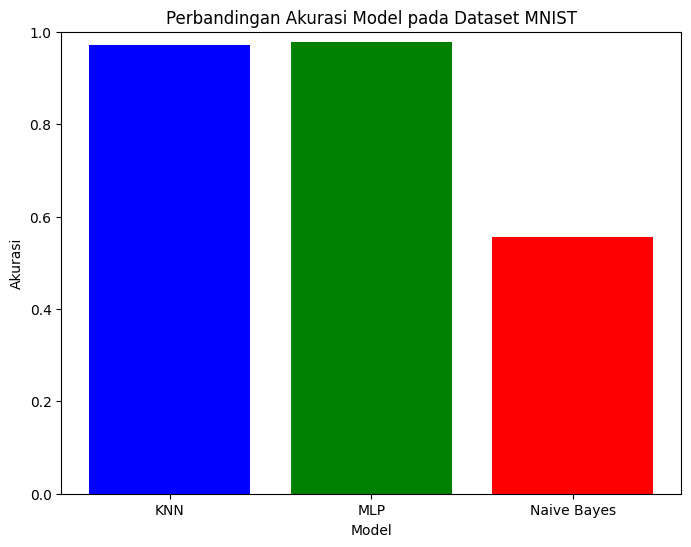

In [7]:
# ----------------------
# Visualisasi Perbandingan Akurasi
# ----------------------

# Membuat grafik perbandingan akurasi
models = ['KNN', 'MLP', 'Naive Bayes']
accuracies = [test_accuracy_knn, test_accuracy_mlp, test_accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model pada Dataset MNIST')
plt.ylim([0.0, 1.0])
plt.show()

## Segmen 8: Meng-upload Gambar dan Melakukan Prediksi
Pada segmen ini, digunakan meng-upload gambar tulisan tangan dan melakukan prediksi menggunakan model yang telah dilatih.

Saving 9988.jpg to 9988.jpg


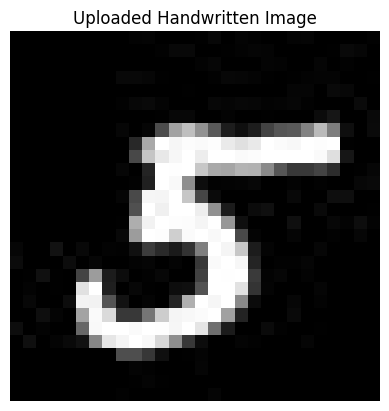

Prediksi dengan KNN: 5
Prediksi dengan MLP: 5
Prediksi dengan Naive Bayes: 1


In [13]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Upload Gambar
# ------------------------------
print("Gunakan ")
uploaded = files.upload()
# Ambil nama file gambar yang di-upload
image_path = next(iter(uploaded))

# ------------------------------
# Memuat dan Menampilkan Gambar
# ------------------------------
img = Image.open(image_path)
img_resized = img.convert('L').resize((28, 28))

# Menampilkan gambar yang di-upload
plt.imshow(img_resized, cmap='gray')
plt.title("Data Test MNIST")
plt.axis('off')
plt.show()

# ------------------------------
# Pra-pemrosesan Gambar: Normalisasi dan Meratakan
# ------------------------------
# Mengonversi gambar yang difilter menjadi array numpy
img_array = np.array(img_resized) / 255.0  # Normalisasi (nilai piksel 0-1)
img_array_flat = img_array.reshape(1, 28 * 28)  # Meratakan gambar menjadi vektor 1D

# ------------------------------
# Prediksi Menggunakan Model
# ------------------------------
# Prediksi dengan KNN
knn_prediction = knn.predict(img_array_flat)

# Prediksi dengan MLP
mlp_prediction = mlp.predict(img_array_flat)

# Prediksi dengan Naive Bayes
nb_pred = nb.predict(img_array_flat)

# Hasil prediksi
print(f"Prediksi dengan KNN: {knn_prediction[0]}")
print(f"Prediksi dengan MLP: {mlp_prediction[0]}")
print(f"Prediksi dengan Naive Bayes: {nb_pred[0]}")